In [ ]:
!pip install tf2onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 440 kB 7.8 MB/s 
     |████████████████████████████████| 12.8 MB 34.1 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0


In [ ]:
import tensorflow as tf

In [ ]:
tf_keras_applications = [
    # ['DenseNet121'      , 224, 224, tf.keras.applications.DenseNet121],
    # ['DenseNet169'      , 224, 224, tf.keras.applications.DenseNet169],
    # ['DenseNet201'      , 224, 224, tf.keras.applications.DenseNet201],
    ['EfficientNetB0'   , 224, 224, tf.keras.applications.EfficientNetB0],
    # ['EfficientNetB1'   , 240, 240, tf.keras.applications.EfficientNetB1],
    # ['EfficientNetB2'   , 260, 260, tf.keras.applications.EfficientNetB2],
    # ['EfficientNetB3'   , 300, 300, tf.keras.applications.EfficientNetB3],
    # ['EfficientNetB4'   , 380, 380, tf.keras.applications.EfficientNetB4],
    # ['EfficientNetB5'   , 456, 456, tf.keras.applications.EfficientNetB5],
    # ['EfficientNetB6'   , 528, 528, tf.keras.applications.EfficientNetB6],
    # ['EfficientNetB7'   , 600, 600, tf.keras.applications.EfficientNetB7],
    # ['InceptionResNetV2', 299, 299, tf.keras.applications.InceptionResNetV2],
    # ['InceptionV3'      , 299, 299, tf.keras.applications.InceptionV3],
    # ['MobileNet'        , 224, 224, tf.keras.applications.MobileNet],
    ['MobileNetV2'      , 224, 224, tf.keras.applications.MobileNetV2],
    ['MobileNetV3Large' , 224, 224, tf.keras.applications.MobileNetV3Large],
    ['MobileNetV3Small' , 224, 224, tf.keras.applications.MobileNetV3Small],
    # ['NASNetLarge'      , 331, 331, tf.keras.applications.NASNetLarge],
    # ['NASNetMobile'     , 224, 224, tf.keras.applications.NASNetMobile],
    # ['ResNet101'        , 224, 224, tf.keras.applications.ResNet101],
    # ['ResNet101V2'      , 224, 224, tf.keras.applications.ResNet101V2],
    # ['ResNet152'        , 224, 224, tf.keras.applications.ResNet152],
    # ['ResNet152V2'      , 224, 224, tf.keras.applications.ResNet152V2],
    # ['ResNet50'         , 224, 224, tf.keras.applications.ResNet50],
    # ['ResNet50V2'       , 224, 224, tf.keras.applications.ResNet50V2],
    # ['VGG16'            , 224, 224, tf.keras.applications.VGG16],
    # ['VGG19'            , 224, 224, tf.keras.applications.VGG19],
    # ['Xception'         , 299, 299, tf.keras.applications.Xception],
]

In [ ]:
models = []

for tf_keras_application in tf_keras_applications:
    model_input_w = tf_keras_application[1]
    model_input_h = tf_keras_application[2]

    models.append([
        tf_keras_application[3](
            weights='imagenet', 
        ), 
        tf_keras_application[0]
    ])

10747904/10734624 [==============================] - 0s 0us/step


In [ ]:
for model_info in models:
    model  = model_info[0]
    model_name  = model_info[1]
    onnx_name = model_name + '.onnx'
    
    tf.saved_model.save(model, model_name)

    !python3 -m tf2onnx.convert --saved-model {model_name} --output {onnx_name}

INFO:tensorflow:Assets written to: EfficientNetB0/assets
/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-06-02 05:48:24,839 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-06-02 05:48:33,896 - INFO - Signatures found in model: [serving_default].
2022-06-02 05:48:33,896 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-06-02 05:48:33,898 - INFO - Output names: ['predictions']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-06-02 05:48:36,390 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py:711: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.

In [7]:
!pip install imread_from_url==0.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for imread-from-url: filename=imread_from_url-0.1.2-py3-none-any.whl size=6564 sha256=dc2451a6c22134f02db2867e89568122cf829b0a04d8697681c9a462b0ec13fd
  Stored in directory: /root/.cache/pip/wheels/10/c4/e7/f5517a33d5b3bd6e32bba66ec56c2183037510439325a029d5
Successfully built imread-from-url
  Attempting uninstall: imread-from-url
    Found existing installation: imread-from-url 0.1.3
    Uninstalling imread-from-url-0.1.3:
      Successfully uninstalled imread-from-url-0.1.3


In [8]:
from imread_from_url import imread_from_url

image = imread_from_url('https://www.pakutaso.com/shared/img/thumb/058Kazukiya17103_TP_V4.jpg')

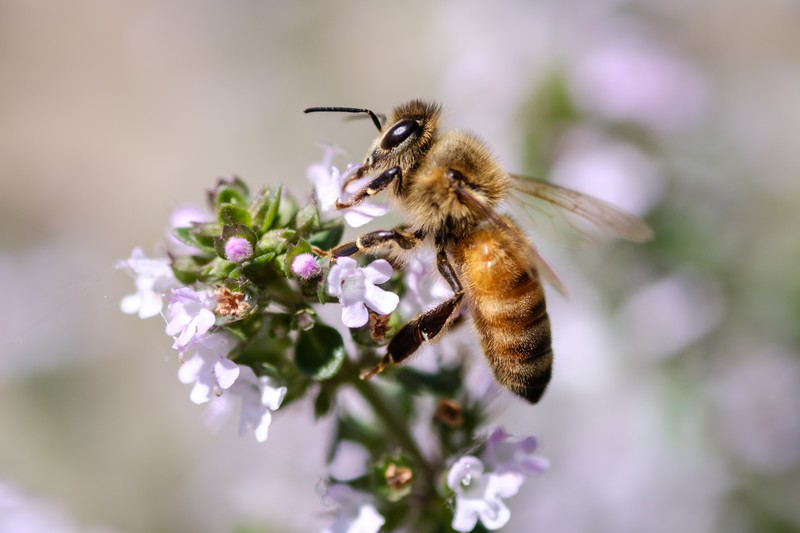

In [9]:
from google.colab.patches import cv2_imshow

cv2_imshow(image)

In [11]:
!pip install onnxruntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 7.6 MB/s 


In [14]:
import cv2
import numpy as np
import onnxruntime

for model_info in models:
    model  = model_info[0]
    model_name  = model_info[1]
    onnx_name = model_name + '.onnx'

    print(onnx_name)
    onnx_session = onnxruntime.InferenceSession(onnx_name)
    print(onnx_session.get_inputs()[0])
    print(onnx_session.get_outputs()[0])

    input_detail = onnx_session.get_inputs()[0]
    input_name = input_detail.name
    output_name = onnx_session.get_outputs()[0].name
    print(input_name)
    print(output_name)

    # 前処理
    input_image = cv2.resize(image, dsize=(224, 224))
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    input_image = input_image.reshape(-1, 224, 224, 3).astype('float32')

    # 推論
    result = onnx_session.run(None, {input_name: input_image})

    # 結果確認
    # ラベル参考：https://github.com/onnx/models/blob/master/vision/classification/synset.txt
    result = np.array(result).squeeze()
    print(np.argsort(result)[::-1][:5])
    print()

EfficientNetB0.onnx
NodeArg(name='input_1', type='tensor(float)', shape=['unk__1111', 224, 224, 3])
NodeArg(name='predictions', type='tensor(float)', shape=['unk__1112', 1000])
input_1
predictions
[309  94 322 308 318]

MobileNetV2.onnx
NodeArg(name='input_2', type='tensor(float)', shape=['unk__531', 224, 224, 3])
NodeArg(name='predictions', type='tensor(float)', shape=['unk__532', 1000])
input_2
predictions
[794 904 556 619 818]

MobileNetV3Large.onnx
NodeArg(name='input_3', type='tensor(float)', shape=['unk__1591', 'unk__1592', 'unk__1593', 3])
NodeArg(name='Predictions', type='tensor(float)', shape=['unk__1594', 1000])
input_3
Predictions
[309 308  94 599 410]

MobileNetV3Small.onnx
NodeArg(name='input_4', type='tensor(float)', shape=['unk__1324', 'unk__1325', 'unk__1326', 3])
NodeArg(name='Predictions', type='tensor(float)', shape=['unk__1327', 1000])
input_4
Predictions
[309  94  16 308  15]

